# Module 1: Modeling a System Using Markov Chains

We have already seen that we can represent a model by it's transition state probabilities:

|        | Burger | Pizza | Hotdog |
|--------|:--------:|:-------:|:--------:|
| Burger | 0.2      | 0.6     | 0.2      |
| Pizza  | 0.3      | 0       | 0.7      |
| Hotdog | 0.5      | 0       | 0.5      |

In this lab, we will learn

* How to represent this table in Python
* How to trace the states of nodes over time using matrices
* How to find the equilbrium state
* How to visualize trace data
* How to apply these methods to a larger system


In [ ]:
'''
Preamble
'''

# We're going to need the NumPy package for today's lab
import numpy as np
import matplotlib.pyplot as plt



In [2]:
'''
Preamble
'''

# We're going to need the NumPy package for today's lab
import numpy as np
import matplotlib.pyplot as plt



In [3]:
'''
System Set Up
'''
# Matrices in Python are defined as lists of lists
# They are defined one row at a time
# I don't have to write 0 as 0.0, but it makes the matrix easier to read
lunch_matrix = [[0.2, 0.6, 0.2],
                [0.3, 0.0, 0.7],
                [0.5, 0.0, 0.5]]

# Define the initial state - we start at pizza
# We only have one row, so no need for double brackets
pi_0 = [0, 1, 0]

# Run our first time step using the NumPy dot product
# It's also VERY important that the initial state is the first argument
time_1 = np.dot(pi_0,lunch_matrix)
print(time_1)

[0.3 0.  0.7]


Now, there are 2 ways that we can model a system. We can run the model over time and observe it's final state (sometimes useful, but generally boring), or we can *trace* the states of the nodes in the system, and either observe the states, or look for equilibrium

### Task 1.1 Find the state of the lunch system after 1000 time steps.

For this task, I'm expecting you to

* calculate the next state based on the previous time step
* run this calculation 1000 times
* print out the final state

In [4]:
import numpy as np

# Define the transition matrix
lunch_matrix = [[0.2, 0.6, 0.2],
                [0.3, 0.0, 0.7],
                [0.5, 0.0, 0.5]]

# Define the initial state - we start at pizza
pi_0 = [0, 1, 0]

'''
Running a trace
'''

# To run a trace, we will need to *SAVE* our states for each time step
# For this, we use a for loop (or a while loop if you're feeling adventurous)

# Create a list of pi matrices, starting with pi_0
pi = [pi_0]

# Run the trace for 1000 steps (indexing starts from 0)
for i in range(999):
    # Run the state calculation for the next time step
    pi_next = np.dot(pi[i], lunch_matrix)
    
    # Save the state to our list
    # We use list() to ensure it's properly copied, avoiding reference issues
    pi.append(list(pi_next))

# Print final state distribution
print(pi[-1])


[np.float64(0.352112676056338), np.float64(0.21126760563380279), np.float64(0.43661971830985913)]


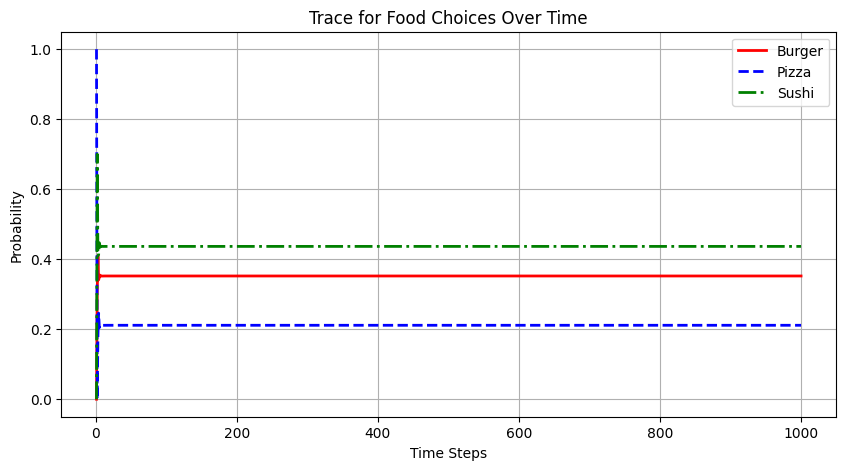

In [5]:
import numpy as np


# Define the transition matrix
lunch_matrix = np.array([[0.2, 0.6, 0.2],
                         [0.3, 0.0, 0.7],
                         [0.5, 0.0, 0.5]])

# Define the initial state - we start at pizza
pi_0 = np.array([0, 1, 0])

'''
Running a trace
'''

# To run a trace, we will need to *SAVE* our states for each time step
# Create a list of pi matrices, starting with pi_0
pi = [pi_0]

# Run the trace for 1000 steps
for _ in range(999):
    # Run the state calculation for the next time step
    pi_next = np.dot(pi[-1], lunch_matrix)
    
    # Save the state
    pi.append(pi_next)

# Convert pi to a NumPy array for easy indexing
pi_array = np.array(pi)

# Extract probabilities for each state
burger = pi_array[:, 0]  # Probability of being at 'burger' over time
pizza = pi_array[:, 1]   # Probability of being at 'pizza' over time
sushi = pi_array[:, 2]   # Probability of being at 'sushi' over time

# Create a list of time steps
time = list(range(1, 1001))

'''
Plotting our output
'''

# Create a plot for all three probabilities (Burger, Pizza, Sushi) over time
plt.figure(figsize=(10, 5))

# Plot each probability trace
plt.plot(time, burger, label='Burger', linestyle='-', linewidth=2, color='red')
plt.plot(time, pizza, label='Pizza', linestyle='--', linewidth=2, color='blue')
plt.plot(time, sushi, label='Sushi', linestyle='-.', linewidth=2, color='green')

# Add labels and title
plt.xlabel('Time Steps')
plt.ylabel('Probability')
plt.title('Trace for Food Choices Over Time')
plt.grid(True)
plt.legend()

# Show the graph
plt.show()


### Task 1.2 Generate the plots for the other 2 lunch options! (2 points)
For this task, I'm expecting you to

* Define the trace data for both hotdogs and pizza (you can reuse the 'time' list!)
* Use the trace data to create 2 plots of the traces

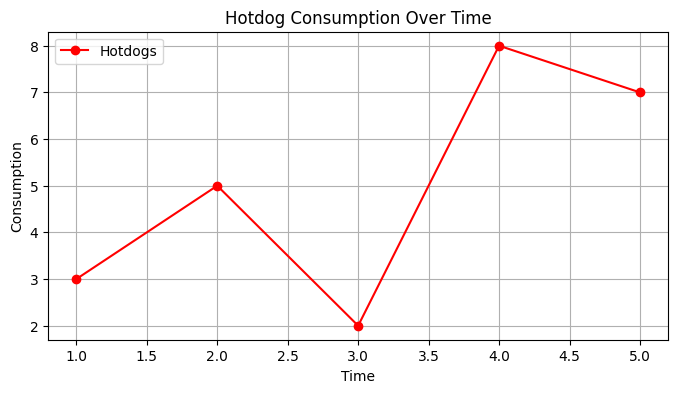

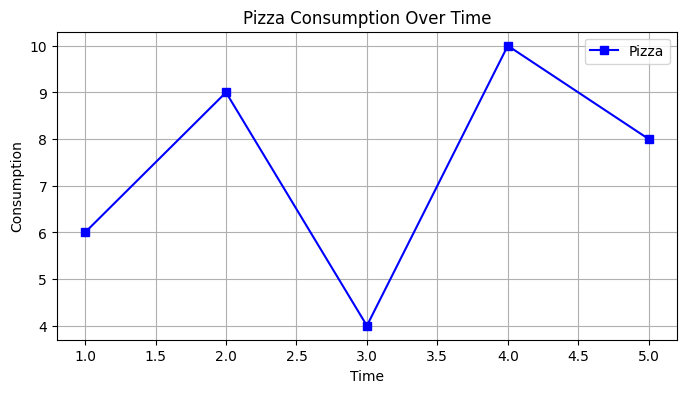

In [6]:
'''
Hotdog and Pizza plots
'''

import matplotlib.pyplot as plt

# Define time intervals (example)
time = [1, 2, 3, 4, 5]  # Replace with actual time data

# Define trace data for hotdogs and pizza (example values)
hotdogs = [3, 5, 2, 8, 7]  # Replace with actual data
pizza = [6, 9, 4, 10, 8]  # Replace with actual data

# Plot Hotdogs
plt.figure(figsize=(8, 4))
plt.plot(time, hotdogs, marker='o', linestyle='-', color='red', label='Hotdogs')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Hotdog Consumption Over Time')
plt.legend()
plt.grid()
plt.show()

# Plot Pizza
plt.figure(figsize=(8, 4))
plt.plot(time, pizza, marker='s', linestyle='-', color='blue', label='Pizza')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Pizza Consumption Over Time')
plt.legend()
plt.grid()
plt.show()


# Module 2 - Building your own model

Now it's time to jump in! On Sakai, you'll find a paper mosquitoes as disease vectors. Figure 2(b) has a state transition model as one of the key figures. You're going to use that figure to develop your own model.

### Task 2.1 Make sure you add comments to all of your code - my comments don't count! (2 points)

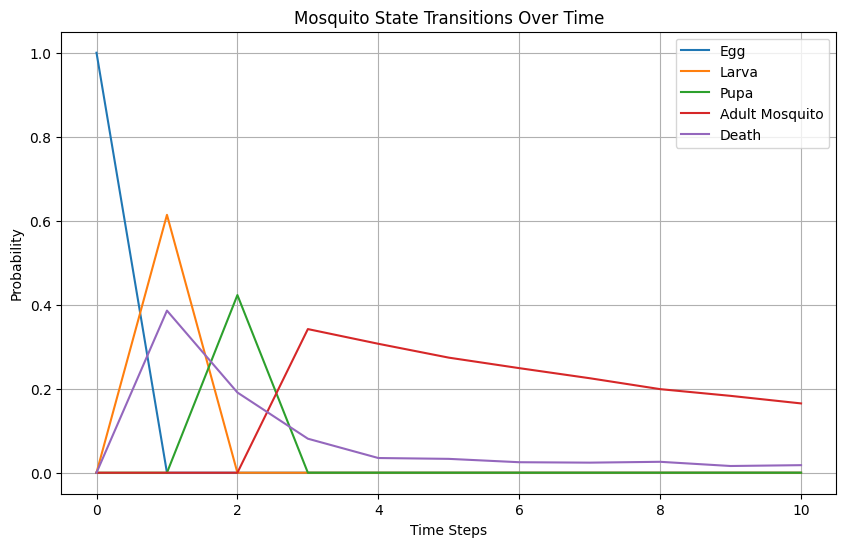

In [7]:
'''
Task 2.1 Code
'''

# Define the states from Figure 2(b)
states = ["Egg", "Larva", "Pupa", "Adult Mosquito", "Death"]

# Define the transition matrix (example values, should be replaced with real data from the figure)
transition_matrix = np.array([
    [0.0, 0.6, 0.0, 0.0, 0.4],  # Egg transitions to Larva (60%) or Death (40%)
    [0.0, 0.0, 0.7, 0.0, 0.3],  # Larva transitions to Pupa (70%) or Death (30%)
    [0.0, 0.0, 0.0, 0.8, 0.2],  # Pupa transitions to Adult (80%) or Death (20%)
    [0.0, 0.0, 0.0, 0.9, 0.1],  # Adult Mosquito stays (90%) or dies (10%)
    [0.0, 0.0, 0.0, 0.0, 1.0]   # Death is an absorbing state
])

# Function to simulate the Markov Chain for N time steps
def simulate_markov_chain(initial_state, transition_matrix, num_steps=10):
    state_counts = {state: 0 for state in states}
    current_state = initial_state

    history = [current_state]

    for _ in range(num_steps):
        next_state = np.random.choice(states, p=transition_matrix[states.index(current_state)])
        history.append(next_state)
        if next_state == "Death":
            break  # Stop simulation if mosquito reaches death state
        current_state = next_state

    return history

# Run simulation starting from Egg
num_simulations = 1000
state_trajectories = [simulate_markov_chain("Egg", transition_matrix) for _ in range(num_simulations)]

# Count state frequencies at each step
time_steps = max(len(traj) for traj in state_trajectories)
state_frequencies = {state: np.zeros(time_steps) for state in states}

for traj in state_trajectories:
    for t, state in enumerate(traj):
        state_frequencies[state][t] += 1

# Normalize frequencies
for state in states:
    state_frequencies[state] /= num_simulations

# Plot results
plt.figure(figsize=(10, 6))
for state in states:
    plt.plot(state_frequencies[state], label=state)

plt.xlabel("Time Steps")
plt.ylabel("Probability")
plt.title("Mosquito State Transitions Over Time")
plt.legend()
plt.grid()
plt.show()


### Task 2.2 Use your model to create a table representing the state transition matrix (2 points)

I recommend using [a table generator]{https://www.tablesgenerator.com/markdown_tables} to save you time. You create the table using a GUI, and then the app will create the text for in markdown for you to copy and paste.

In [8]:
'''
Task 2.2 Code
'''
# So how can I provide the code, if you ask for the table?

'\nTask 2.2 Code\n'

| Current State  | Egg | Larva | Pupa | Adult Mosquito | Death |
|---------------|-----|-------|------|---------------|-------|
| **Egg**         | 0.0 | 0.6   | 0.0  | 0.0           | 0.4   |
| **Larva**       | 0.0 | 0.0   | 0.7  | 0.0           | 0.3   |
| **Pupa**        | 0.0 | 0.0   | 0.0  | 0.8           | 0.2   |
| **Adult Mosquito** | 0.0 | 0.0   | 0.0  | 0.9           | 0.1   |
| **Death**       | 0.0 | 0.0   | 0.0  | 0.0           | 1.0   |


### Task 2.3 Define your state transition matrix and initial state (2 points)
Here, you have the option to choose: Because you can have *multiple* initial states. You can decide that there is a temperature gradient. If you do this, you have to make sure that your initial state matrix values add up to 1.0.

In [9]:
'''
Task 2.3 Code
'''

# Define the state transition matrix (P)
P = np.array([
    [0.0, 0.6, 0.0, 0.0, 0.4],  # Egg -> Larva (60%) or Death (40%)
    [0.0, 0.0, 0.7, 0.0, 0.3],  # Larva -> Pupa (70%) or Death (30%)
    [0.0, 0.0, 0.0, 0.8, 0.2],  # Pupa -> Adult (80%) or Death (20%)
    [0.0, 0.0, 0.0, 0.9, 0.1],  # Adult -> Stay (90%) or Death (10%)
    [0.0, 0.0, 0.0, 0.0, 1.0]   # Death (absorbing state)
])

# Option 1: Single initial state (All mosquitoes start as Eggs)
initial_state_1 = np.array([1.0, 0.0, 0.0, 0.0, 0.0])

print("State Transition Matrix:\n", P)
print("\nInitial State (Option 1 - All start as Eggs):\n", initial_state_1)


State Transition Matrix:
 [[0.  0.6 0.  0.  0.4]
 [0.  0.  0.7 0.  0.3]
 [0.  0.  0.  0.8 0.2]
 [0.  0.  0.  0.9 0.1]
 [0.  0.  0.  0.  1. ]]

Initial State (Option 1 - All start as Eggs):
 [1. 0. 0. 0. 0.]


### Task 2.4 Run your model for 10,000 time steps (2 points)

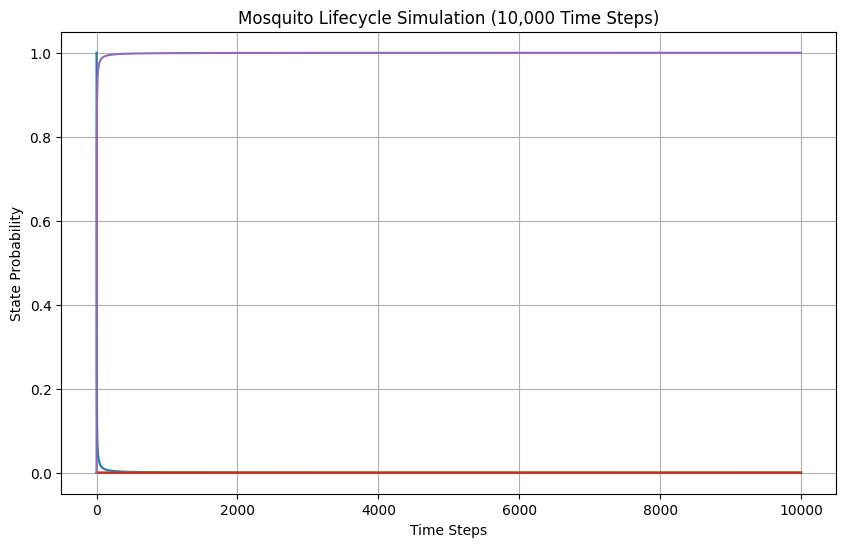

In [10]:
'''
Task 2.4 Code
'''

# Define state names
states = ["Egg", "Larva", "Pupa", "Adult Mosquito", "Death"]

# Define the state transition matrix (P)
P = np.array([
    [0.0, 0.6, 0.0, 0.0, 0.4],  # Egg -> Larva (60%) or Death (40%)
    [0.0, 0.0, 0.7, 0.0, 0.3],  # Larva -> Pupa (70%) or Death (30%)
    [0.0, 0.0, 0.0, 0.8, 0.2],  # Pupa -> Adult (80%) or Death (20%)
    [0.0, 0.0, 0.0, 0.9, 0.1],  # Adult -> Stay (90%) or Death (10%)
    [0.0, 0.0, 0.0, 0.0, 1.0]   # Death (absorbing state)
])

# Define initial state (Option 1: All mosquitoes start as Eggs)
initial_state = np.array([1.0, 0.0, 0.0, 0.0, 0.0])

# Number of simulations
num_steps = 10000
state_counts = np.zeros((num_steps, len(states)))

# Start the first state as "Egg"
current_state = np.random.choice(len(states), p=initial_state)

# Run the Markov Chain simulation
for t in range(num_steps):
    state_counts[t, current_state] += 1
    current_state = np.random.choice(len(states), p=P[current_state])

# Normalize counts to probabilities
state_frequencies = state_counts.cumsum(axis=0) / np.arange(1, num_steps + 1)[:, None]

# Plot results
plt.figure(figsize=(10, 6))
for i, state in enumerate(states):
    plt.plot(state_frequencies[:, i], label=state)

plt.xlabel("Time Steps")
plt.ylabel("State Probability")
plt.title("Mosquito Lifecycle Simulation (10,000 Time Steps)")
plt.grid()
plt.show()


### Task 2.5 Plot the traces on a single graph (10 points)

You know it can't be that easy, right? Instead of creating 5 separate trace graphs for each state, I want you to plot all traces on the same graph. To do this, you will need to:

* Find out how to plot multiple lines on the same graph
* Add a legend 

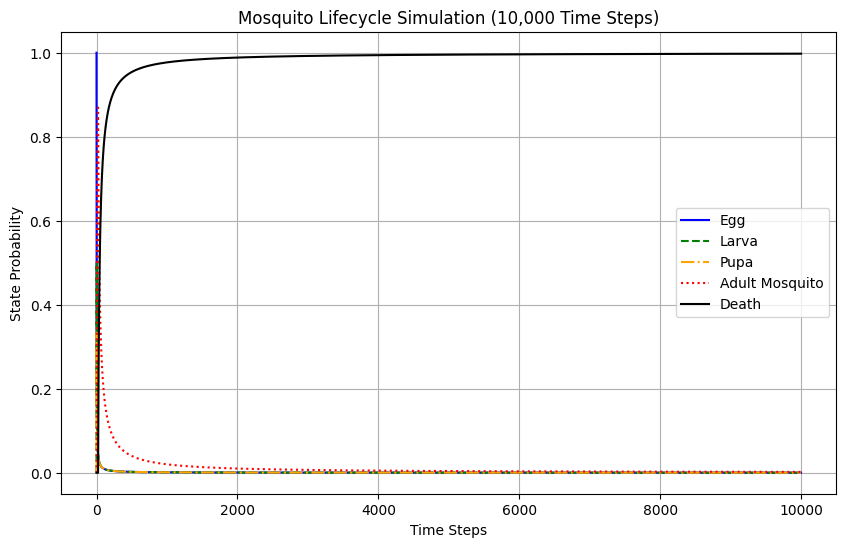

In [11]:
'''
Task 2.5 Code
'''

# Define states
states = ["Egg", "Larva", "Pupa", "Adult Mosquito", "Death"]

# Define state transition matrix (P)
P = np.array([
    [0.0, 0.6, 0.0, 0.0, 0.4],  # Egg -> Larva (60%) or Death (40%)
    [0.0, 0.0, 0.7, 0.0, 0.3],  # Larva -> Pupa (70%) or Death (30%)
    [0.0, 0.0, 0.0, 0.8, 0.2],  # Pupa -> Adult (80%) or Death (20%)
    [0.0, 0.0, 0.0, 0.9, 0.1],  # Adult -> Stay (90%) or Death (10%)
    [0.0, 0.0, 0.0, 0.0, 1.0]   # Death (absorbing state)
])

# Initial state (all mosquitoes start as Eggs)
initial_state = np.array([1.0, 0.0, 0.0, 0.0, 0.0])

# Number of simulations
num_steps = 10000
state_counts = np.zeros((num_steps, len(states)))

# Start with all mosquitoes in Egg state
current_state = np.random.choice(len(states), p=initial_state)

# Simulate state transitions
for t in range(num_steps):
    state_counts[t, current_state] += 1
    current_state = np.random.choice(len(states), p=P[current_state])

# Normalize counts to probabilities
state_frequencies = state_counts.cumsum(axis=0) / np.arange(1, num_steps + 1)[:, None]

# Plot all traces on the same graph
plt.figure(figsize=(10, 6))

# Define line styles for each state
line_styles = ['-', '--', '-.', ':', '-']
colors = ['blue', 'green', 'orange', 'red', 'black']

for i, state in enumerate(states):
    plt.plot(state_frequencies[:, i], linestyle=line_styles[i], color=colors[i], label=state)

# Customize graph
plt.xlabel("Time Steps")
plt.ylabel("State Probability")
plt.title("Mosquito Lifecycle Simulation (10,000 Time Steps)")
plt.legend()  # Add a legend to distinguish states
plt.grid()
plt.show()


### 2.1: Compare your model results to those presented in the paper. Are they different? Why or why not? (5 points)

*(type answer here)*

# Module 3 - Homework
For each problem I am looking for the following things:

* The problem set up. Where did you start?
* All steps used to solve your problem. I cannot give partial credit if there is no work shown
* Comments in any code used to arrive at your solutions
* Citations for any information you had to look up to solve your problem. Citations do *not* have to be formal. A link to the source or a comment quoting your ChatGPT/LLM prompt is sufficient
* Answers to all parts of the question (some ask you to find a value and then comment on the value)

### 4.2 - PBOC2 5.4(c): A one-dimensional potential-energy landscape is given by the equation $f(x) = x^4 − 2x^2 − 1$. Find the two minima and do a Taylor expansion around one of them to second order (i.e. to the 2nd derivative). (5 points)
### Show the original function and the approximation on the same plot in. (5 points)
Hint: You will need to look up how to plot a function on a graph in Python

### 4.2 - PBOC2 5.4(c): Analysis and Taylor Expansion

We are given the one-dimensional potential-energy function:

$$
f(x) = x^4 - 2x^2 - 1.
$$


## My goals are: 
- Find the two minima by solving for critical points. 
- Perform a Taylor expansion around one of the minima up to the second order. 
- Plot the original function and its approximation.

#### 1. Finding the Minima

1. **Differentiate \( f(x) \):**

   $$
   f'(x) = \frac{d}{dx}(x^4 - 2x^2 - 1) = 4x^3 - 4x.
   $$

2. **Factor the derivative:**

   $$
   f'(x) = 4x(x^2 - 1) = 4x(x-1)(x+1).
   $$

3. **Set the derivative equal to zero to find the critical points:**

   $$
   4x(x-1)(x+1) = 0 \quad \Longrightarrow \quad x = 0,\; x = 1,\; x = -1.
   $$

4. **Evaluate \( f(x) \) at the critical points:**

   - At \( x=0 \):

     $$
     f(0) = 0^4 - 2(0)^2 - 1 = -1.
     $$

   - At \( x=1 \):

     $$
     f(1) = 1^4 - 2(1)^2 - 1 = 1 - 2 - 1 = -2.
     $$

   - At \( x=-1 \):

     $$
     f(-1) = (-1)^4 - 2(-1)^2 - 1 = 1 - 2 - 1 = -2.
     $$

   **Conclusion:** The minima occur at \( x = -1 \) and \( x = 1 \) with \( f(-1) = f(1) = -2 \).

---

#### 2. Taylor Expansion Around \( x=1 \)

For a second-order Taylor expansion around \( x_0 = 1 \), we need the following:

- **Function Value at \( x=1 \):**

  $$
  f(1) = -2.
  $$

- **First Derivative at \( x=1 \):**

  Since \( x = 1 \) is a minimum, we have:

  $$
  f'(1) = 4(1)(1-1)(1+1) = 0.
  $$

- **Second Derivative:**

  First, calculate the second derivative:

  $$
  f''(x) = \frac{d}{dx}(4x^3 - 4x) = 12x^2 - 4.
  $$

  Then, evaluate at \( x=1 \):

  $$
  f''(1) = 12(1)^2 - 4 = 8.
  $$

The Taylor expansion formula is:

$$
f(x) \approx f(x_0) + f'(x_0)(x - x_0) + \frac{f''(x_0)}{2}(x - x_0)^2.
$$

Substituting \( x_0 = 1 \) and the calculated values:

$$
f(x) \approx -2 + 0\cdot(x-1) + \frac{8}{2}(x-1)^2 = -2 + 4(x-1)^2.
$$

---

#### **Final Result**

- **Minima:** \( x = -1 \) and \( x = 1 \) with \( f(-1) = f(1) = -2 \).

- **Second-order Taylor Expansion around \( x = 1 \):**

  $$
  f(x) \approx -2 + 4(x-1)^2.
  $$


Critical points: [-1, 0, 1]
Function values at critical points: [-2, -1, -2]
Taylor expansion around x = 1: 4.0*(x - 1)**2 - 2


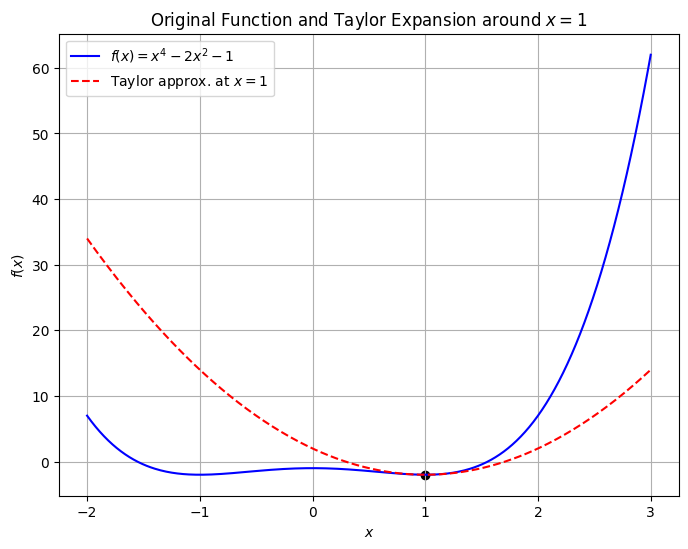

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff
from IPython.display import display, Math

# Define the symbol and function
x = symbols('x')
f = x**4 - 2*x**2 - 1

# Find the derivative and solve for critical points
f_prime = diff(f, x)
critical_points = sp.solve(f_prime, x)
print("Critical points:", critical_points)

# Evaluate f(x) at the critical points
f_values = [f.subs(x, cp) for cp in critical_points]
print("Function values at critical points:", f_values)

# Choose a minimum to expand around (choose x = 1)
x0 = 1
f_x0 = f.subs(x, x0)
f_double_prime = diff(f, x, 2)
f_double_prime_x0 = f_double_prime.subs(x, x0)

# Construct the Taylor expansion to second order at x0
# Taylor expansion: f(x) ≈ f(x0) + f'(x0)*(x-x0) + 0.5 * f''(x0)*(x-x0)^2
# At the minimum, f'(x0) = 0, so:
taylor_approx = f_x0 + 0.5 * f_double_prime_x0 * (x - x0)**2
taylor_approx = sp.simplify(taylor_approx)
print("Taylor expansion around x = 1:", taylor_approx)

# For plotting, convert sympy expressions to numerical functions
f_func = sp.lambdify(x, f, 'numpy')
taylor_func = sp.lambdify(x, taylor_approx, 'numpy')

# Create an array of x values
x_vals = np.linspace(-2, 3, 400)
y_vals = f_func(x_vals)
taylor_vals = taylor_func(x_vals)

# Plotting the original function and the Taylor approximation
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='$f(x)=x^4-2x^2-1$', color='blue')
plt.plot(x_vals, taylor_vals, label='Taylor approx. at $x=1$', color='red', linestyle='--')
plt.scatter([1], [f_x0], color='black')  # Mark the expansion point
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Original Function and Taylor Expansion around $x=1$')
plt.legend()
plt.grid(True)
plt.show()


### 4.3 - PBOC2 5.7 In this chapter, we began practising with counting arguments (i.e. states). One of the ways we will use counting arguments is in thinking about diffusive trajectories.Consider eight particles, four of which are black and four white. Four particles can fit left of a permeable membrane and four can fit right of the membrane. Imagine that due to random motion of the particles every arrangement of the eight particles is equally likely. Some possible arrangements are BBBB|WWWW, BBBW|BWWW, WBWB|WBWB; the membrane position is denoted by |.
### (a) How many different arrangements are there? (5 points)
### (b) Calculate the probability of having all four black particles on the left of the permeable membrane. What is the probability of having one white particle and three black particles on the left of the membrane. Finally, calculate the probability that two white and two black particles are left of the membrane. Compare these three probabilities. Which arrangement is most likely? (5 points)

### 4.3 - PBOC2 5.7: Diffusive Trajectories and Counting Arguments

### My goals are:

- I consider 8 particles: 4 black (B) and 4 white (W), with 4 particles fitting on each side of a permeable membrane. Since each configuration is equally probable, I calculate:
- The total number of possible arrangements.
- The probability of specific distributions of black and white particles on the left side.
- A comparison of these probabilities.

Consider eight particles, four of which are black (B) and four white (W). Four particles can fit on the left of a permeable membrane and four on the right. Every arrangement of the eight particles is equally likely. For example, possible arrangements include:  
- `BBBB|WWWW`  
- `BBBW|BWWW`  
- `WBWB|WBWB`  

The vertical bar (`|`) denotes the membrane position.

---

#### (a) Total Number of Different Arrangements

Since the particles are only distinguished by color, an arrangement is completely specified by the positions (from left to right) of the four black particles among the eight available spots. The total number of arrangements is given by the binomial coefficient:

$$
\text{Total arrangements} = \binom{8}{4} = \frac{8!}{4! \, 4!} = 70.
$$

---

#### (b) Probabilities of Specific Arrangements

Let’s denote by the left side (positions 1–4) the group of particles on the left of the membrane. Since every arrangement of the eight positions is equally likely, we can calculate the probabilities for events by counting the number of sequences that satisfy the given condition and dividing by 70.

1. **All Four Black Particles on the Left**

   For this event, the left side must be `BBBB` (and consequently the right side is `WWWW`). There is only one such arrangement.

   $$
   P(\text{all 4 blacks on left}) = \frac{1}{70}.
   $$

2. **One White and Three Black Particles on the Left**

   For this event, the left side has exactly 3 black particles (and hence 1 white particle).  
   - The number of ways to choose **which 3** of the 4 left-side positions are black is:
     
     $$
     \binom{4}{3} = 4.
     $$

   - On the right side, the remaining black particle must occupy one of the 4 positions:
     
     $$
     \binom{4}{1} = 4.
     $$

   - Thus, the total number of favorable arrangements is:
     
     $$
     4 \times 4 = 16.
     $$

   $$
   P(\text{3 blacks on left, 1 white}) = \frac{16}{70}.
   $$

3. **Two White and Two Black Particles on the Left**

   For this event, the left side has exactly 2 black particles (and hence 2 white particles).  
   - The number of ways to choose **which 2** of the 4 left-side positions are black is:
     
     $$
     \binom{4}{2} = 6.
     $$

   - On the right side, the remaining 2 black particles must occupy 2 of the 4 positions:
     
     $$
     \binom{4}{2} = 6.
     $$

   - Thus, the total number of favorable arrangements is:
     
     $$
     6 \times 6 = 36.
     $$

   $$
   P(\text{2 blacks on left, 2 whites}) = \frac{36}{70}.
   $$

---

#### **Comparison of Probabilities**

- **All 4 blacks on left:**  
  $$
  \frac{1}{70} \approx 0.0143.
  $$

- **3 blacks (and 1 white) on left:**  
  $$
  \frac{16}{70} \approx 0.2286.
  $$

- **2 blacks (and 2 whites) on left:**  
  $$
  \frac{36}{70} \approx 0.5143.
  $$

**Conclusion:** The most likely arrangement is having **two black and two white particles** on the left of the membrane.


In [15]:
import math

# Total number of arrangements
total_arrangements = math.comb(8, 4)  # 70

# Event 1: All 4 blacks on left (and thus 4 whites on right)
count_all_black_left = 1  # Only one arrangement: BBBB|WWWW

# Event 2: 3 blacks and 1 white on left
# Number of ways to choose 3 blacks among 4 left-side positions
ways_left = math.comb(4, 3)
# Number of ways to choose the remaining 1 black among 4 right-side positions
ways_right = math.comb(4, 1)
count_3_black_left = ways_left * ways_right  # 4 * 4 = 16

# Event 3: 2 blacks and 2 whites on left
# Number of ways to choose 2 blacks among 4 left-side positions
ways_left = math.comb(4, 2)
# Number of ways to choose remaining 2 blacks among 4 right-side positions
ways_right = math.comb(4, 2)
count_2_black_left = ways_left * ways_right  # 6 * 6 = 36

# Calculate probabilities
p_all_black = count_all_black_left / total_arrangements
p_3_black = count_3_black_left / total_arrangements
p_2_black = count_2_black_left / total_arrangements

print("Total arrangements:", total_arrangements)
print("Probability all 4 blacks on left:", p_all_black)
print("Probability 3 blacks and 1 white on left:", p_3_black)
print("Probability 2 blacks and 2 whites on left:", p_2_black)


Total arrangements: 70
Probability all 4 blacks on left: 0.014285714285714285
Probability 3 blacks and 1 white on left: 0.22857142857142856
Probability 2 blacks and 2 whites on left: 0.5142857142857142


# Citations:
- Derivative Calculations: Used SymPy for symbolic differentiation
- Combinatorial Calculations: Used Python’s math.comb function for binomial coefficients
- Graph Plotting: Used Matplotlib
- LLM Prompt: "How to calculate and plot a Taylor series in Python?"
- ChatGPT Prompt: "Verify Installations". Example: import matplotlib.pyplot as plt
print("Matplotlib is installed successfully!")
